In [2]:
# Importing libs

import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# configuration for graphics

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

# rcParams['figure.figsize'] = 14, 8


In [3]:
import os
import sys

NOTEBOOK_DIR = os.path.dirname(os.path.realpath("__file__"))
PROJECT_ROOT = os.path.dirname(NOTEBOOK_DIR)

sys.path.append(PROJECT_ROOT) # make my_module available to import

from dataset_statistics.utils import add_column_to_frames, get_value_counts, COLOURS, generate_dic_to_plot

In [4]:
# Read all dataframes (session 1)

df_1 = pd.read_csv('datasets/participant_1/study_20210526_01_01.mp4.csv')
df_2 = pd.read_csv('datasets/participant_1/study_20210526_01_02.mp4.csv')
df_3 = pd.read_csv('datasets/participant_1/study_20210526_01_03.mp4.csv')
df_4 = pd.read_csv('datasets/participant_1/study_20210526_01_04.mp4.csv')
df_5 = pd.read_csv('datasets/participant_1/study_20210526_01_05.mp4.csv')
df_6 = pd.read_csv('datasets/participant_1/study_20210526_01_06.mp4.csv')
df_7 = pd.read_csv('datasets/participant_1/study_20210526_01_07.mp4.csv')


In [5]:
frames = [df_1, df_2, df_3, df_4, df_5, df_6, df_7]

frames = add_column_to_frames(frames)

frames_dict = []
for frame in frames: 
    frame_dict = get_value_counts(frame)
    frames_dict.append(frame_dict)

frames_dict
df = pd.DataFrame(frames_dict)
df

,green,blue,yellow,red,video_part
0,1296,102,33,0,1
1,981,510,10,0,2
2,1235,80,38,148,3
3,317,540,402,242,4
4,398,942,161,0,5
5,501,982,18,0,6
6,430,0,126,0,7


In [10]:
df.melt("video_part", var_name="emotion_zone", value_name='count')

,video_part,emotion_zone,count
0,1,green,1296
1,2,green,981
2,3,green,1235
3,4,green,317
4,5,green,398
5,6,green,501
6,7,green,430
7,1,blue,102
8,2,blue,510
9,3,blue,80


# Distribution of emotion zones from session_1

Each plot represents a 5 minutes period of time, each entry is a window of 0.4 seconds (400 miliseconds)

[(0.0, 100.0)]

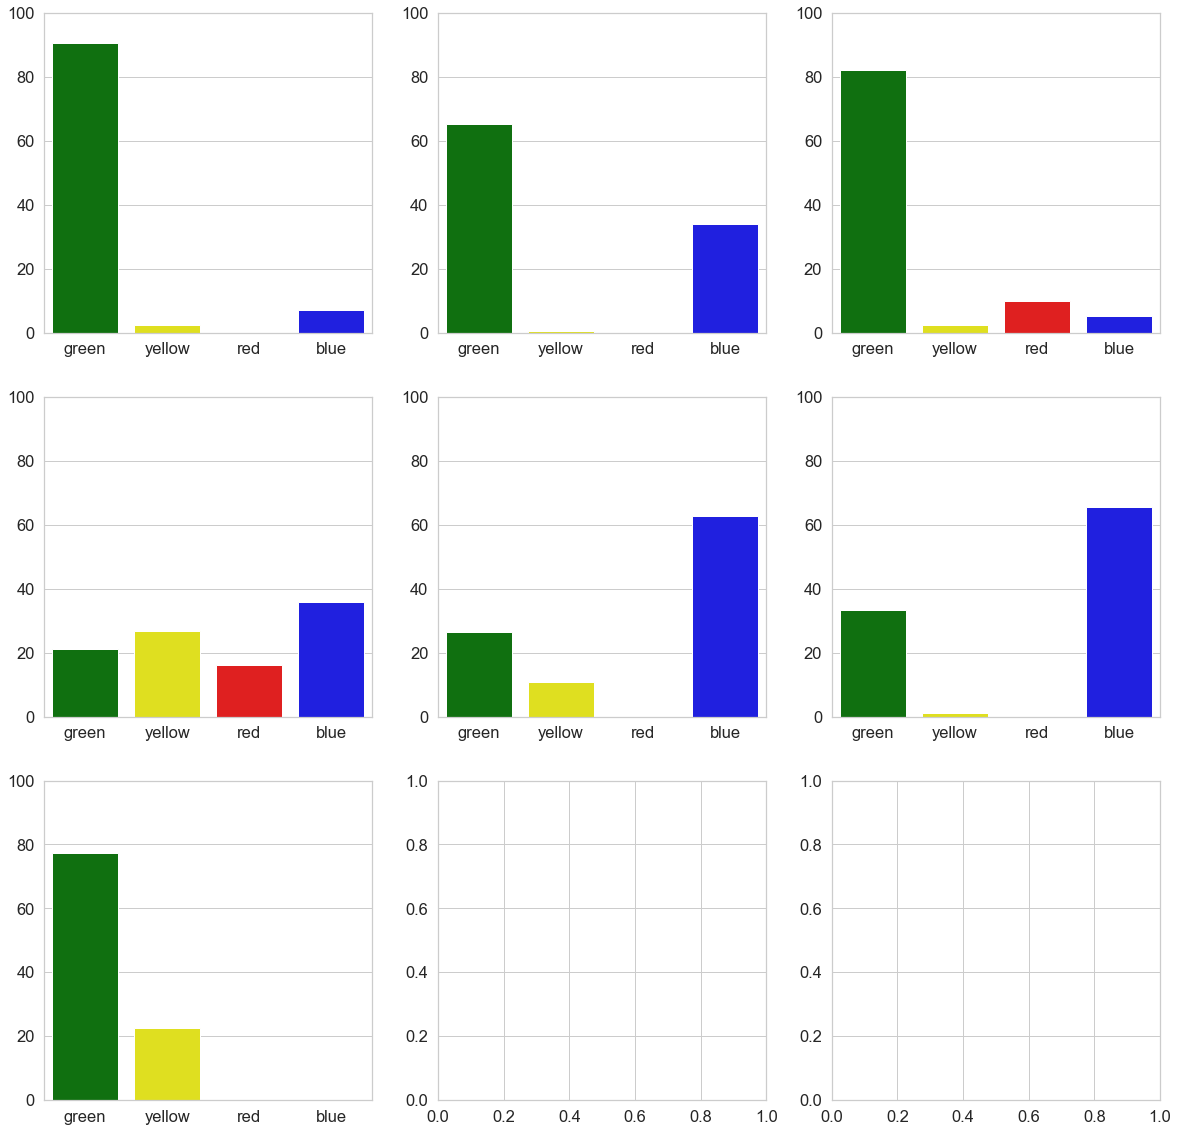

In [6]:
fig, ax = plt.subplots(3, 3,figsize=(20,20))

k1, v1, p1 = generate_dic_to_plot(df_1)
k2, v2, p2 = generate_dic_to_plot(df_2)
k3, v3, p3 = generate_dic_to_plot(df_3)
k4, v4, p4 = generate_dic_to_plot(df_4)
k5, v5, p5 = generate_dic_to_plot(df_5)
k6, v6, p6 = generate_dic_to_plot(df_6)
k7, v7, p7 = generate_dic_to_plot(df_7)
sns.barplot(x=k1,y=p1,ax=ax[0][0],ci=None, palette=COLOURS).set(ylim=(0, 100))
sns.barplot(x=k2,y=p2,ax=ax[0][1],ci=None, palette=COLOURS).set(ylim=(0, 100))
sns.barplot(x=k3,y=p3,ax=ax[0][2],ci=None, palette=COLOURS).set(ylim=(0, 100))
sns.barplot(x=k4,y=p4,ax=ax[1][0],ci=None, palette=COLOURS).set(ylim=(0, 100))
sns.barplot(x=k5,y=p5,ax=ax[1][1],ci=None, palette=COLOURS).set(ylim=(0, 100))
sns.barplot(x=k6,y=p6,ax=ax[1][2],ci=None, palette=COLOURS).set(ylim=(0, 100))
sns.barplot(x=k7,y=p7,ax=ax[2][0],ci=None, palette=COLOURS).set(ylim=(0, 100))


In [15]:
import altair as alt

# source = pd.DataFrame({
#     'emotion_zone': ['green', 'yellow', 'blue', 'red', 'green', 'yellow', 'blue', 'red'],
#     'values': [1296, 33, 102, 0 , 981, 10, 510, 0 ],
#     'video part': ['part 1', 'part 1', 'part 1', 'part 1', 'part 2', 'part 2', 'part 2', 'part 2']
# })


# Using pandas function to transform from wide format to long format, so Altair can work better

source = df.melt("video_part", var_name="emotion_zone", value_name='values')

emotions = ['green', 'yellow', 'blue', 'red']
colours = ['green', 'yellow', 'blue', 'red']

alt.Chart(source).mark_bar().encode(
    alt.X('emotion_zone:N', sort=['green', 'yellow', 'blue', 'red']),
    alt.Y('values:Q'),
    column=alt.Column('video_part:N', title='Video Part - Session 1'),
    color=alt.Color('emotion_zone', scale=alt.Scale(domain=emotions, range=colours), title='Emotion zones')

)

alt.Chart(...)